In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import kid_readout.roach.heterodyne
import kid_readout.utils.sweeps

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [5]:
ri.set_fft_gain(4)
ri.set_lo(830.)
ri.set_dac_atten(3)

In [6]:
res = np.load('/home/gjones/2015-08-06-dense-64-res-lo-830.npy')

In [7]:
ri.set_tone_freqs(res,nsamp=2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 750.25   ,  761.78125,  777.15625,  777.78125,  778.40625,
        778.90625,  779.5625 ,  780.21875,  780.8125 ,  781.34375,
        781.84375,  782.40625,  785.15625,  785.9375 ,  801.84375,
        818.65625,  819.71875,  820.6875 ,  821.53125,  822.40625,
        823.     ,  835.78125,  836.5    ,  837.4375 ,  847.96875,
        848.5    ,  863.59375,  864.3125 ,  865.21875,  865.8125 ,
        866.4375 ,  868.     ,  869.15625,  869.90625,  870.4375 ,
        870.96875,  875.4375 ,  875.9375 ,  876.71875,  877.25   ,
        882.15625,  882.90625,  883.78125,  889.8125 ,  890.3125 ,
        890.8125 ,  891.6875 ,  892.3125 ,  895.5625 ,  908.875  ,
        909.4375 ,  914.34375,  920.28125,  920.78125,  921.46875,
        927.75   ,  928.375  ,  933.96875,  934.5625 ,  935.28125,
        935.78125,  936.28125,  945.4375 ,  957.4375 ])

In [10]:
np.diff(res)

array([ 11.53125,  15.375  ,   0.625  ,   0.625  ,   0.5    ,   0.65625,
         0.65625,   0.59375,   0.53125,   0.5    ,   0.5625 ,   2.75   ,
         0.78125,  15.90625,  16.8125 ,   1.0625 ,   0.96875,   0.84375,
         0.875  ,   0.59375,  12.78125,   0.71875,   0.9375 ,  10.53125,
         0.53125,  15.09375,   0.71875,   0.90625,   0.59375,   0.625  ,
         1.5625 ,   1.15625,   0.75   ,   0.53125,   0.53125,   4.46875,
         0.5    ,   0.78125,   0.53125,   4.90625,   0.75   ,   0.875  ,
         6.03125,   0.5    ,   0.5    ,   0.875  ,   0.625  ,   3.25   ,
        13.3125 ,   0.5625 ,   4.90625,   5.9375 ,   0.5    ,   0.6875 ,
         6.28125,   0.625  ,   5.59375,   0.59375,   0.71875,   0.5    ,
         0.5    ,   9.15625,  12.     ])

In [8]:
ri.select_fft_bins(range(64))

In [58]:
_7[ri.readout_selection[5]]

869.15625

In [9]:
d,addr = ri.get_data(64)

sequence number skip, expected: 28656 got 28688 inserting 32 null packets 16 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155839.pkl
sequence number skip, expected: 28704 got 28736 inserting 32 null packets 32 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155839.pkl
sequence number skip, expected: 28752 got 28784 inserting 32 null packets 48 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155840.pkl
sequence number skip, expected: 28800 got 28816 inserting 16 null packets 64 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155840.pkl
sequence number skip, expected: 28832 got 28848 inserting 16 null packets 80 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155841.pkl
sequence number skip, expected: 28864 got 28896 inserting 32 null packets 96 0
caught special case, writing to disk
wrote data to: udp_skip_2015-08-18_155841.pkl
sequence number skip, expect

KeyboardInterrupt: 

In [ ]:
d.shape

In [171]:
fold = d.reshape((-1,256,32))

In [172]:
folded = fold.mean(0)
folded = folded - folded[:50,:].mean(0)

In [173]:
folded.shape

(256, 32)

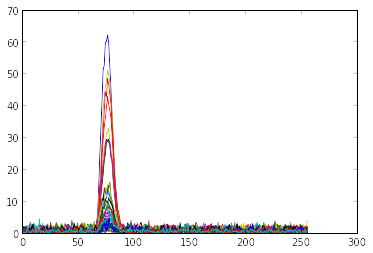

In [174]:
blah = plot(np.abs(folded.imag)+np.abs(folded.real))
#xlim(150,200)
#ylim(0,20)

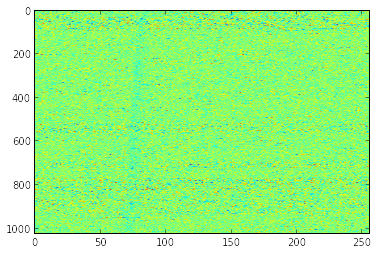

In [175]:
imshow(fold[:,:,4].real,aspect='auto')

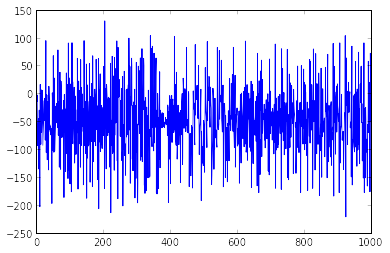

In [54]:
plot(d.imag[:1000,5])

In [18]:
(2**14/512e6)*256

0.008192

In [467]:
import kid_readout.equipment.led_controller
reload(kid_readout.equipment.led_controller)

<module 'kid_readout.equipment.led_controller' from '/home/gjones/readout/kid_readout/kid_readout/equipment/led_controller.pyc'>

In [688]:
led = kid_readout.equipment.led_controller.LedController(baudrate=19200,port='/dev/ttyACM1')

In [502]:
8204*8

65632

In [561]:
values = []
for row in range(1,5):
    for col in range(7):
        for irow in range(5):
            if irow == row:
                values.append(str(2**col))
            else:
                values.append(str(0))
while len(values) < 32*5:
    values.extend(['0']*5)
frames = ','.join(values)
print frames
print len(frames.split(','))/5.

0,1,0,0,0,0,2,0,0,0,0,4,0,0,0,0,8,0,0,0,0,16,0,0,0,0,32,0,0,0,0,64,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,4,0,0,0,0,8,0,0,0,0,16,0,0,0,0,32,0,0,0,0,64,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,4,0,0,0,0,8,0,0,0,0,16,0,0,0,0,32,0,0,0,0,64,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,4,0,0,0,0,8,0,0,0,0,16,0,0,0,0,32,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32.0


In [671]:
8204*4

32816

In [689]:
#print led.sendget('8204,100,1,0,0,0,0,1',interchar_delay=0.2)
#print led.sendget('65632,100,1,127,127,127,127,127',interchar_delay=0.2)
#print led.sendget('8204,10,1,127,127,127,127,127',interchar_delay=0.2)
#print led.sendget('8204,100,1,127,0,0,0,0',interchar_delay=0.02)
print led.sendget('32817,1000,32,'+frames,interchar_delay=0.04)

{0,1,0,0,0,}
{0,2,0,0,0,}
{0,4,0,0,0,}
{0,8,0,0,0,}
{0,16,0,0,0,}
{0,32,0,0,0,}
{0,64,0,0,0,}
{0,0,1,0,0,}
{0,0,2,0,0,}
{0,0,4,0,0,}
{0,0,8,0,0,}
{0,0,16,0,0,}
{0,0,32,0,0,}
{0,0,64,0,0,}
{0,0,0,1,0,}
{0,0,0,2,0,}
{0,0,0,4,0,}
{0,0,0,8,0,}
{0,0,0,16,0,}
{0,0,0,32,0,}
{0,0,0,64,0,}
{0,0,0,0,1,}
{0,0,0,0,2,}
{0,0,0,0,4,}
{0,0,0,0,8,}
{0,0,0,0,16,}
{0,0,0,0,32,}
{0,0,0,0,64,}
{0,0,0,0,0,}
{0,0,0,0,0,}
{0,0,0,0,0,}
{0,0,0,0,0,}



In [158]:
led.ser.inWaiting()

0

In [153]:
led.ser.read(100)

''

In [687]:
led.ser.close()

In [59]:
data = np.empty((7,4,32,2**18),dtype='complex')
rows = np.arange(1,8)
cols = np.arange(2,6)
for irow,row in enumerate(rows):
    for icol,col in enumerate(cols):
        print led.sendget(('%d,%d,8204,200' % (row,col)),interchar_delay=0.2)
        time.sleep(1)
        print led.ser.read(100)
        d,addr = ri.get_data(64)
        data[irow,icol,:,:] = d.T

Row 1, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow None 24851 0 65536 0 26384 24851
Row 1, Column 3
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow None 24851 0 65536 0 31360 24851
Row 1, Column 4
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 1, Column 5
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 3
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 4
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 5
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 3, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow N

In [60]:
2

2

In [488]:
data.shape

(7, 4, 32, 262144)

In [722]:
folded = data.reshape((7,4,32,-1,256))

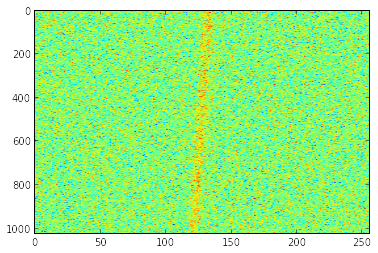

In [732]:
imshow(folded[3,2,23,:,:].real,aspect='auto')

In [490]:
fold = folded.mean(3)

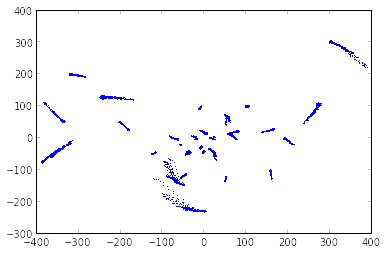

In [491]:
plot(fold.real.flatten(),fold.imag.flatten(),',')

In [64]:
fold.shape

(7, 4, 32, 256)

In [65]:
fab = np.abs(fold.real-np.median(fold.real,axis=3)[:,:,:,None])+np.abs(fold.imag-np.median(fold.imag,axis=3)[:,:,:,None])

In [734]:
fab.shape

(32, 64, 32768)

In [67]:
np.save('/home/gjones/2015-08-07-dense-array-led-test.npy',fab)

In [733]:
np.savez('/home/gjones/2015-08-07-dense-array-led-test-full-data.npz',data=data,f0s=res,lo=830.)

In [68]:
pk = fab.max(3)

In [69]:
pk.shape

(7, 4, 32)

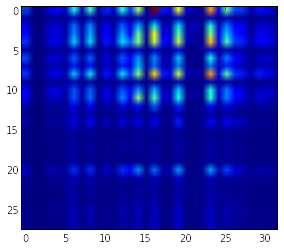

In [70]:
imshow(pk.reshape((-1,32)))

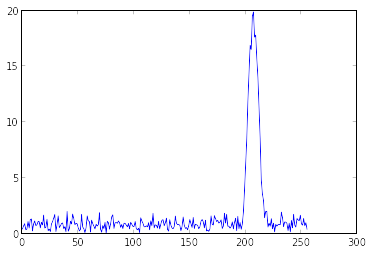

In [71]:
plot(fab[2,2,4,:])

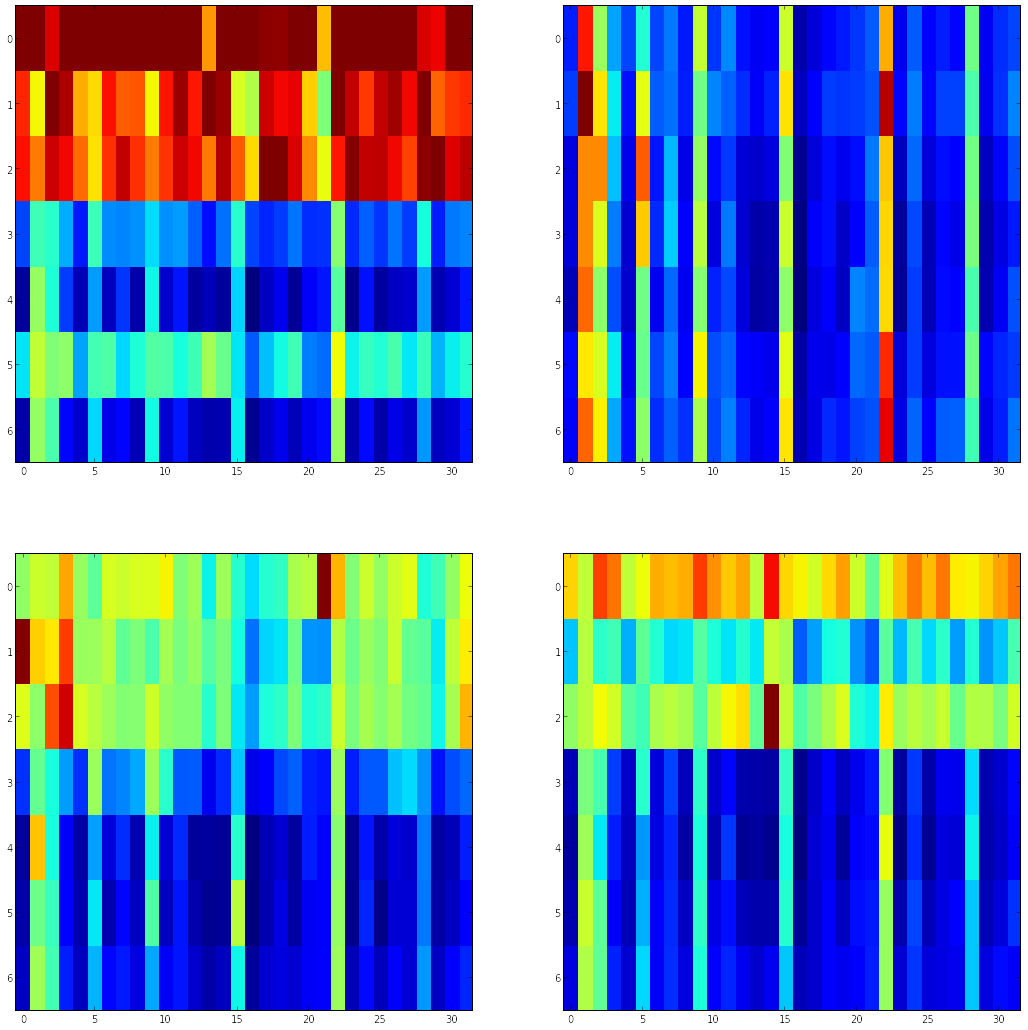

In [72]:
fig,axs = subplots(2,2,figsize=(18,18))
for k in range(4):
    ax = axs.flatten()[k]
    ax.imshow((pk[:,k,:])/pk.max(0).max(0),aspect='auto',interpolation='nearest')#,clim=(pk.min(),pk.max()))
    

In [218]:
7*6*5*4*3*2*4*3*2

120960

<matplotlib.colorbar.Colorbar instance at 0x7fec11f016c8>

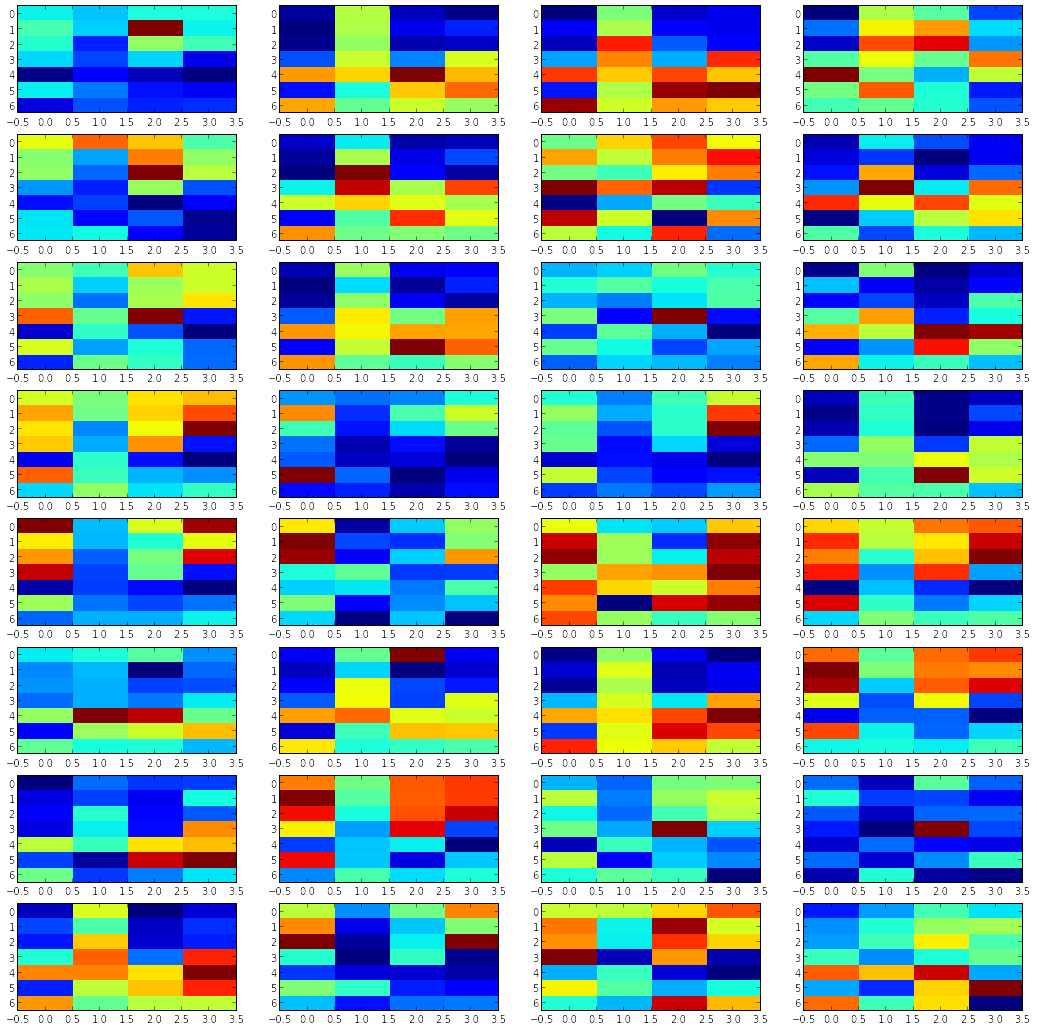

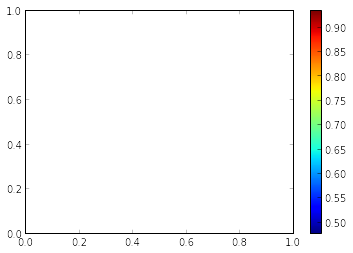

In [73]:
fig,axs = subplots(8,4,figsize=(18,18))
for n in range(32):
    ax = axs.flatten()[n]
    im = ax.imshow((pk[:,:,n]/np.median(pk,axis=2)),aspect='auto',interpolation='nearest')#,clim=(-3,0))
figure()
colorbar(im)

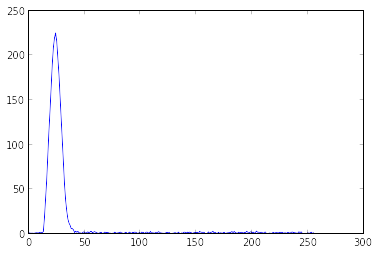

In [74]:
plot(fab[0,0,16,:])

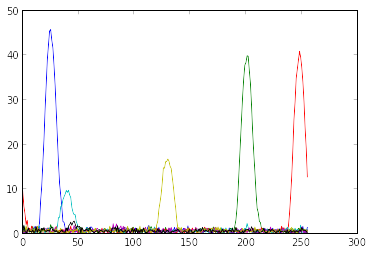

In [75]:
plot(fab[:,0,0,:].T)

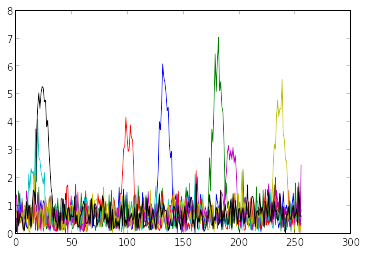

In [76]:
plot(fab[:,1,0,:].T)

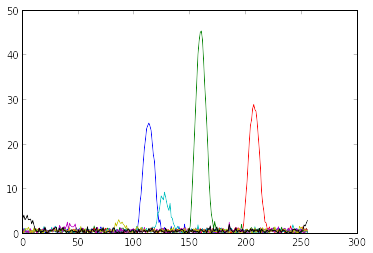

In [77]:
plot(fab[:,2,0,:].T)

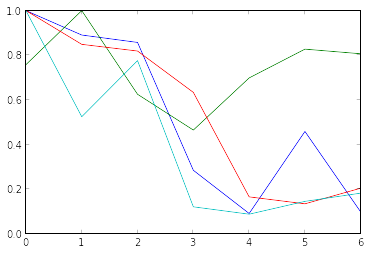

In [121]:
plot(pk[:,:,10]/pk[:,:,10].max(0))

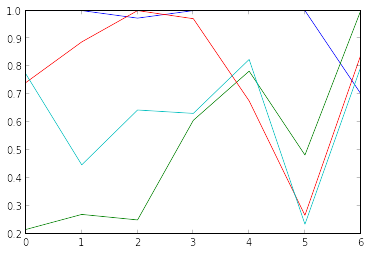

In [85]:
plot(pk[:,:,3]/pk[:,:,3].max(1)[:,None])

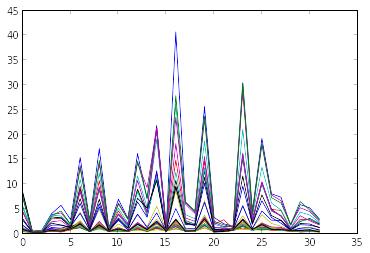

In [145]:
blah =plot((pkr).T/np.median(pkr))

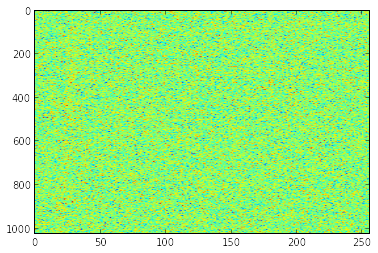

In [141]:
imshow(folded[0,0,1,:,:].real,aspect='auto')

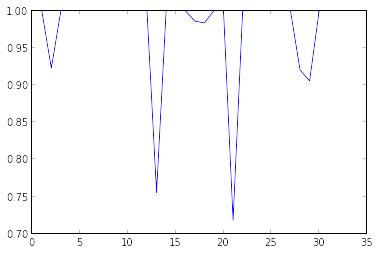

In [92]:
plot(pk[0,0,:]/pk.max(0).max(0))

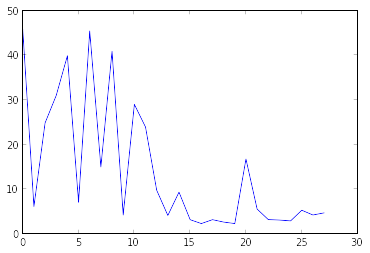

In [97]:
plot(pk[:,:,0].flatten())

In [98]:
pkr= pk.reshape((-1,32))

In [100]:
order  = pkr.argsort(axis=0)

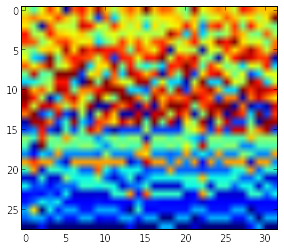

In [105]:
imshow(order)

In [106]:
order2= pkr.argsort(axis=1)

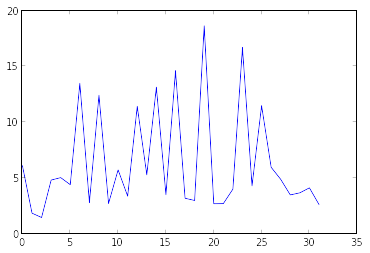

In [118]:
plot(pkr[1,:])

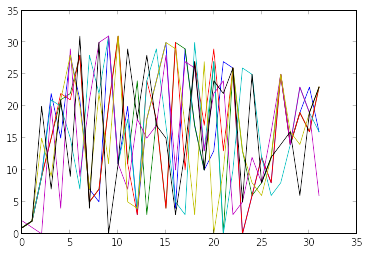

In [151]:
plot(order2[::4,:].T)

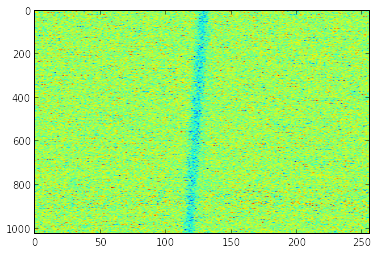

In [177]:
imshow(folded[0,0,4,:,:].real,aspect='auto')

In [239]:
data.shape

(7, 4, 32, 262144)

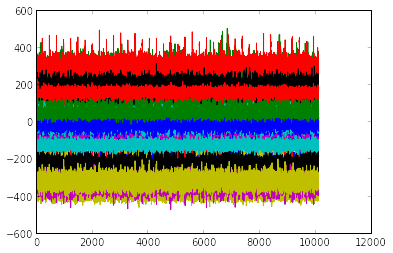

In [119]:
blah = plot(data[0,0,:,154200:164300].real.T)

In [690]:
d,addr = ri.get_data(512)

detected mcnt overflow None 24851 0 65536 0 1296 24851
detected mcnt overflow None 24851 0 131072 1 66832 24851
detected mcnt overflow None 24851 0 196608 2 132368 24851
detected mcnt overflow None 24851 0 262144 3 197904 24851


In [691]:
d.shape

(2097152, 32)

In [752]:
dm = d.reshape((-1,16,32)).mean(1)

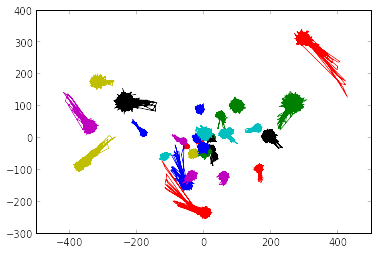

In [757]:
blah=plot(dm[:2048,:].real,dm[:2048,:].imag)

In [692]:
fold = d.T.reshape((32,-1,1024*32))

In [750]:
np.savez('/data/detectors/2015-08-17-led-controller-full-sequence.npz',fold=fold,res=res,lo=830.,frames=frames)

In [751]:
fold.shape

(32, 64, 32768)

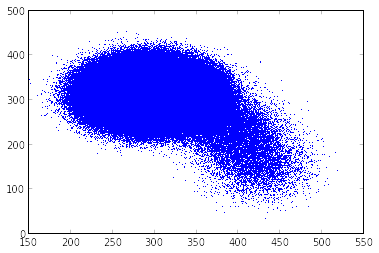

In [694]:
plot(d[:,23].real,d[:,23].imag,',')

In [662]:
(60./256)*8204

1922.8125

In [663]:
1922.8/(256*8)

0.9388671875

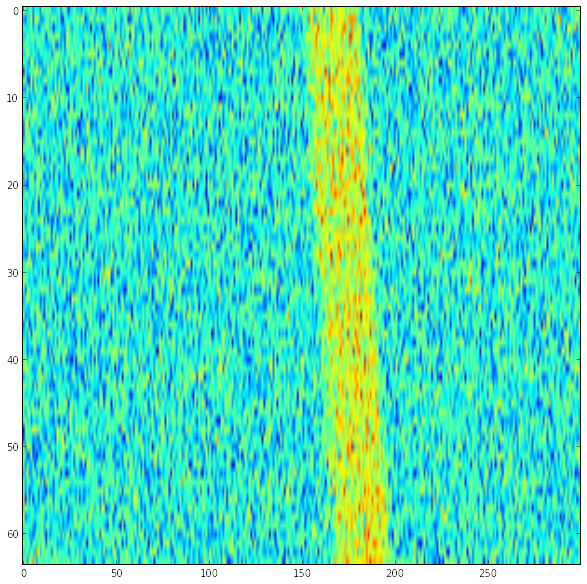

In [695]:
figure(figsize=(10,10))
imshow(fold[16,:,7000:7300].imag,aspect='auto')

(-2000, 2000)

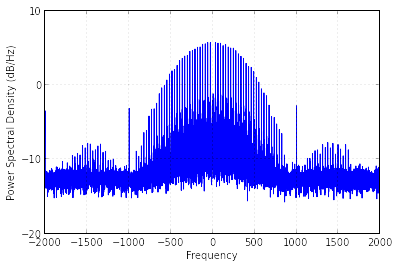

In [696]:
blah=psd(d[:,23]-d[:,23].mean(),NFFT=2**16,Fs=512e6/2**14)
xlim(-2000,2000)

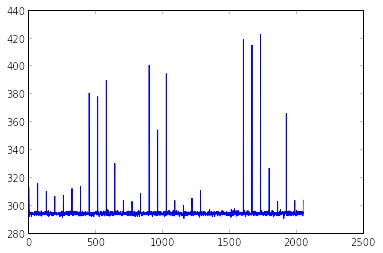

In [699]:
t = np.arange(fold.shape[-1])*32/(1.0*fold.shape[-1])
#plot(t,fold[23,:,:].real.mean(0).reshape((-1,)))
plot(fold[23,:,:].real.mean(0).reshape((-1,16)).mean(1))

In [698]:
100*35

3500

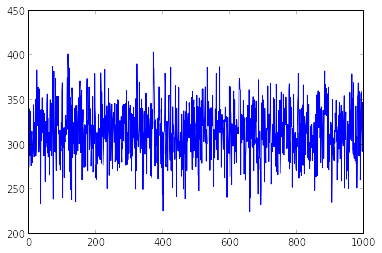

In [478]:
plot(d[:1000,23].real)

In [700]:
dabs = np.abs(d.real-np.median(d.real,axis=0))  + np.abs(d.imag-np.median(d.imag,axis=0))

In [712]:
fab = dabs.T.reshape((32,-1,1024*32))
fab = fab - np.median(fab,axis=2)[:,:,None]

In [713]:
fab.shape

(32, 64, 32768)

<matplotlib.colorbar.Colorbar instance at 0x7fea529c9ef0>

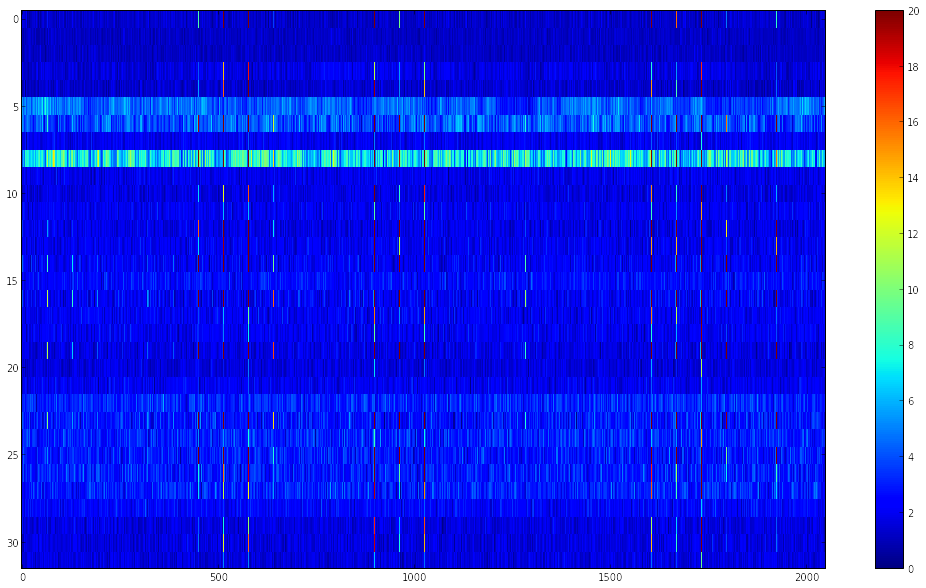

In [716]:
figure(figsize=(18,10))
imshow(fab.mean(1).reshape(32,-1,16).mean(2),aspect='auto',interpolation='nearest',clim=(0,20))
colorbar()

In [718]:
mx = fab.mean(1).reshape(32,-1,16).mean(2).reshape(32,32,-1).max(2)

In [719]:
mx.shape

(32, 32)

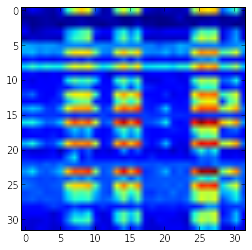

In [721]:
imshow(np.log10(mx))

(1000, 1040)

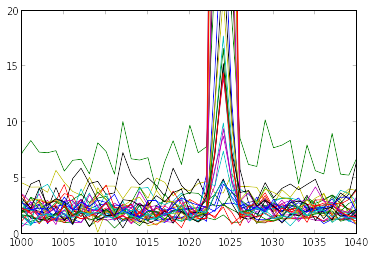

In [748]:
blah = plot(fab.mean(1).reshape(32,-1,16).mean(2).T)
ylim(0,20)
xlim(1000,1040)

In [749]:
len('Columbia Experimental Cosmology')

31